### 다중회귀 - 당노병 사례

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 1. 당뇨병 데이터셋

In [300]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


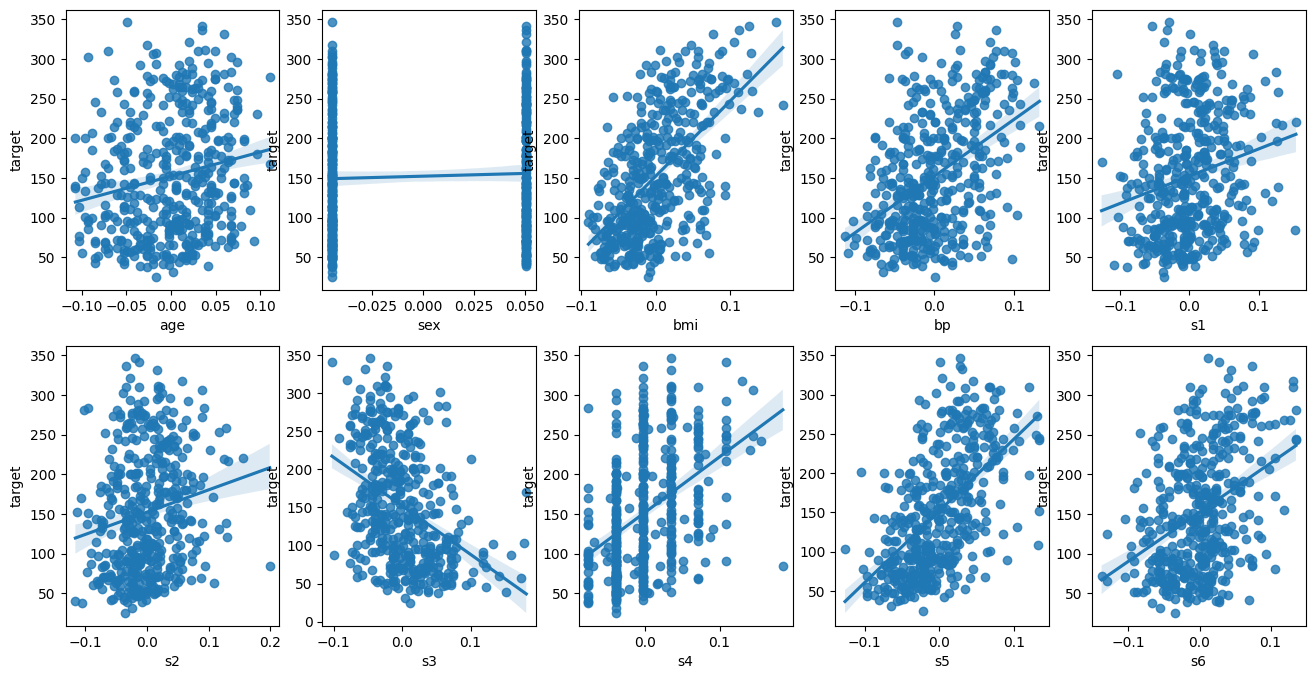

In [301]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])
plt.show()

#### 2. Feature 별 결정 계수(R squared)

In [302]:
from sklearn.linear_model import LinearRegression
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, df.target.values)
    score = lr.score(X, df.target.values)
    print(f'{feature}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


#### 3. 다중 성형회귀

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.target.values, test_size=0.1, random_state=170
)

##### 1) 결정계수

In [304]:
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print(r2_lr, mse_lr)

0.7310708178997277 1901.0921285505394


##### 2) Ridge

In [305]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)
print(r2_rg, mse_rg)

0.5433281830921819 3228.266972271609


##### 3) Lasso

In [306]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)
print(r2_ls, mse_ls)

0.4250437621990951 4064.433504047108


##### 4) SVC

In [307]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)
print(r2_sv, mse_sv)

0.20838745432434802 5596.002515207563


##### 5) Random Forest

In [308]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2000)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
print(r2_rf, mse_rf)

0.6336054477678044 2590.086333333333


##### 6) XGBoost

In [309]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)
print(r2_xg, mse_xg)

0.5397655096059311 3253.4519316293545


##### 7) 비교
- Linear 모델이 R2값(0.7311)도 가장 크고, MSE값(1901.0921) 은 작아서 가장 예측도가 좋다.

In [310]:
print('\t\tLinear\t\tRidge\t\tLasso\t\tSVC\t\tRF\t\tXG')
print(f'R Squared\t{r2_lr:.4f}\t\t{r2_rg:.4f}\t\t{r2_ls:.4f}\t\t{r2_sv:.4f}\t\t{r2_rf:.4f}\t\t{r2_xg:.4f}')
print(f'MSE\t\t{mse_lr:.4f}\t{mse_rg:.4f}\t{mse_ls:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

		Linear		Ridge		Lasso		SVC		RF		XG
R Squared	0.7311		0.5433		0.4250		0.2084		0.6336		0.5398
MSE		1901.0921	3228.2670	4064.4335	5596.0025	2590.0863	3253.4519


In [311]:
df_r = pd.DataFrame({
  'y':y_test, 'Linear': pred_lr, 'Ridge': pred_rg, 'Lasso': pred_ls, 'SVC': pred_sv, 'RF': pred_rf, 'XG': pred_xg
})
df_r.head(10)

,y,Linear,Ridge,Lasso,SVC,RF,XG
0,198.0,181.582749,161.863753,161.014722,143.471661,169.77,174.803787
1,39.0,60.074930,93.687853,123.722990,125.200613,95.76,69.864395
2,229.0,186.616823,185.272072,177.953733,153.628194,180.44,197.829041
3,145.0,122.298652,140.266344,141.701120,133.306261,126.90,81.459648
4,91.0,176.264325,170.760183,153.221047,151.753963,158.00,150.702225
5,346.0,254.342578,205.043477,206.490579,150.314046,176.40,155.486008
6,144.0,175.970164,167.136070,162.824497,145.142626,143.62,124.138893
7,279.0,208.672774,189.629777,178.528958,154.796392,179.86,257.453156
8,51.0,124.003196,141.784249,142.990493,135.478186,137.02,131.059540
9,74.0,133.598040,142.520580,148.823675,131.957285,117.17,176.358200


In [312]:
# 상관도
df_r.corr()

,y,Linear,Ridge,Lasso,SVC,RF,XG
y,1.000000,0.888735,0.839241,0.884669,0.765310,0.844366,0.744042
Linear,0.888735,1.000000,0.973597,0.953744,0.907848,0.918786,0.817214
Ridge,0.839241,0.973597,1.000000,0.930299,0.933083,0.902203,0.803378
Lasso,0.884669,0.953744,0.930299,1.000000,0.885354,0.893276,0.773964
SVC,0.765310,0.907848,0.933083,0.885354,1.000000,0.888601,0.833037
RF,0.844366,0.918786,0.902203,0.893276,0.888601,1.000000,0.865049
XG,0.744042,0.817214,0.803378,0.773964,0.833037,0.865049,1.000000


In [313]:
df_r.corr()['y'].sort_values()

XG        0.744042
SVC       0.765310
Ridge     0.839241
RF        0.844366
Lasso     0.884669
Linear    0.888735
y         1.000000
Name: y, dtype: float64

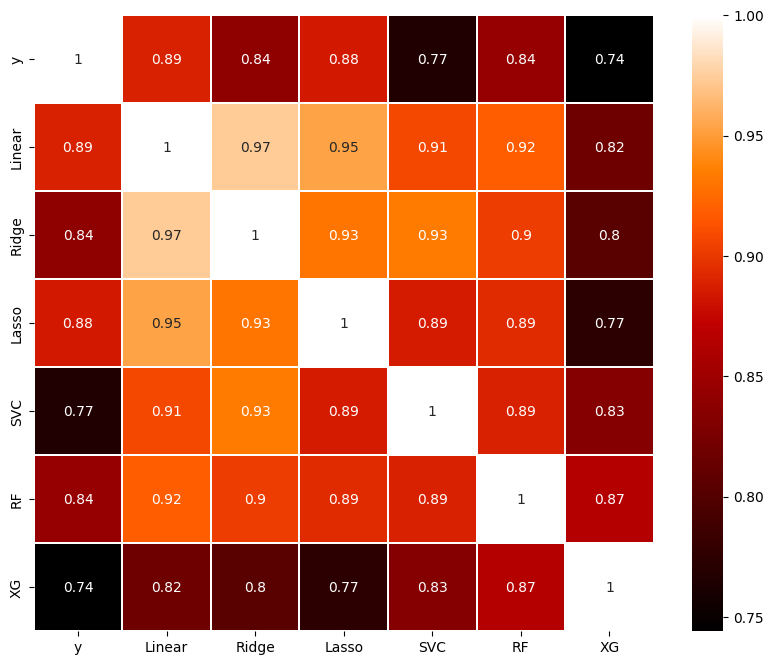

In [314]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(10, 8))
sns.heatmap(df_r.corr(), lw=0.1, cmap=colormap, linecolor='white', annot=True)
plt.show()